In [185]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
tf.__version__

'2.1.0'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [5]:
## Loading the DataBase

In [6]:
# pd.read_csv('WISDM_ar_v1.1_raw.txt')

In [9]:
file=open('WISDM_ar_v1.1_raw.txt')
lines=file.readlines()
processedlist=[]
for i,line in enumerate(lines):
    try:
        line=line.split(',')
        last=line[5].split(';')[0]
        last=last.strip()
        if last== '':
            break;
        temp=[line[0],line[1],line[2],line[3],line[4],last]
        processedlist.append(temp)
    except:
        print('error at line number:', i )
        
    

error at line number: 281873
error at line number: 281874
error at line number: 281875


In [15]:
#SO we cae to know this that these are lines having error
len(processedlist)

343416

In [17]:
column=['user','activity','time','x','y','z']

In [18]:
data=pd.DataFrame(data=processedlist,columns=column)

In [19]:
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [20]:
## now saving this preprocessed data to an csv

In [22]:
# pre_processed_data=data.to_csv('preprocessed_improperdata_.csv', index=False)

In [24]:
data.shape

(343416, 6)

In [26]:
data.info()
#SInce we can see that all the numbers here are non null-object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
user        343416 non-null object
activity    343416 non-null object
time        343416 non-null object
x           343416 non-null object
y           343416 non-null object
z           343416 non-null object
dtypes: object(6)
memory usage: 15.7+ MB


In [29]:
data.isnull().sum()
#checking null values

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [34]:
#Now making it proper 
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

# EDA


In [35]:
#Chaning x,y,z into flot type as it is obevious


In [40]:
data['x']=data['x'].astype('float')
data['y']=data['y'].astype('float')
data['z']=data['z'].astype('float')


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
user        343416 non-null object
activity    343416 non-null object
time        343416 non-null object
x           343416 non-null float64
y           343416 non-null float64
z           343416 non-null float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [48]:
#PLOTTING THE DATA
Fs=20
activities=data['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

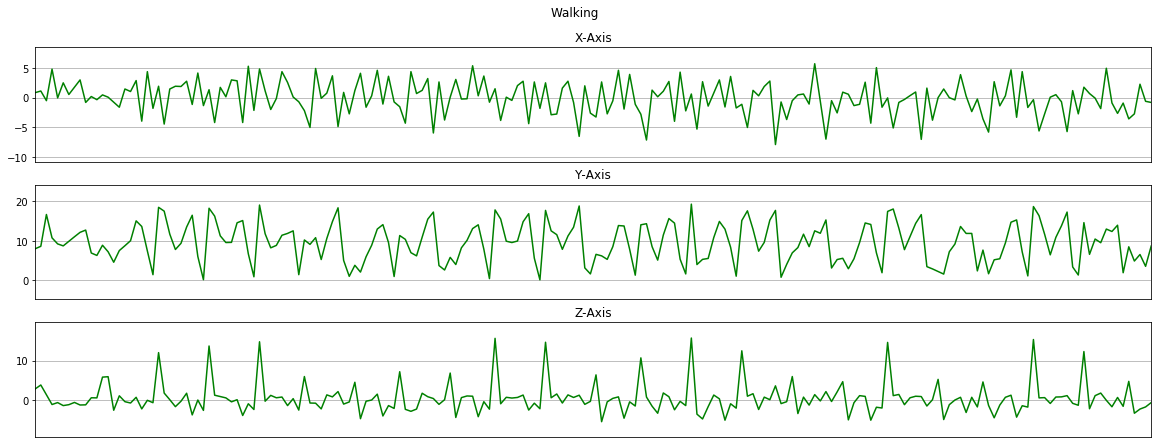

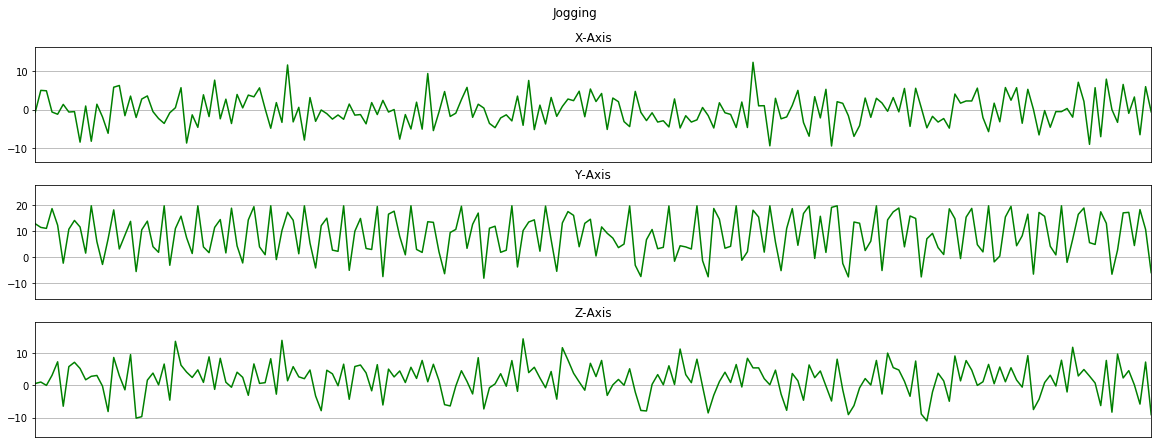

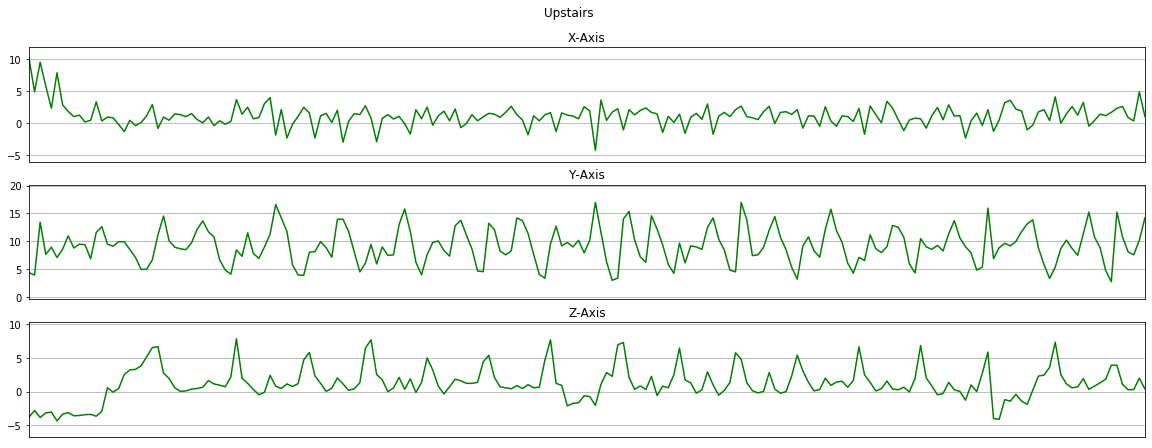

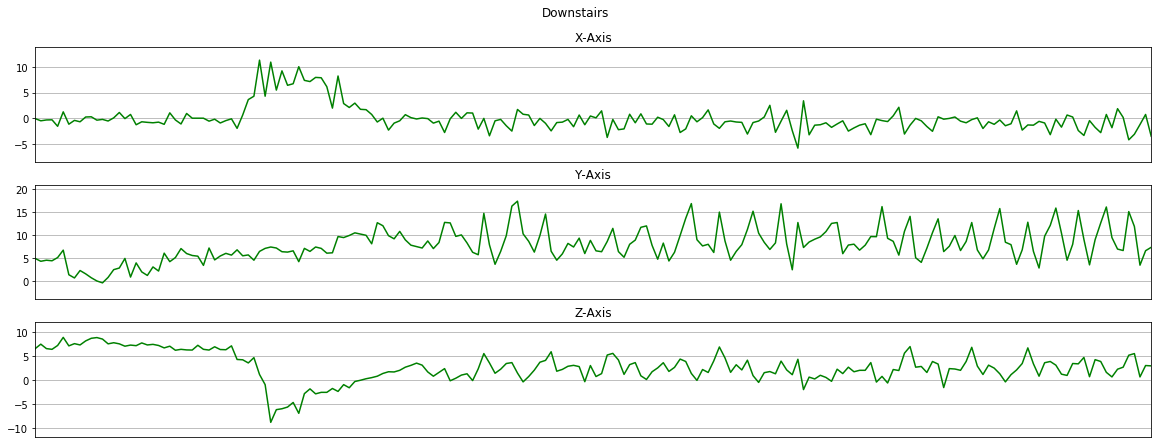

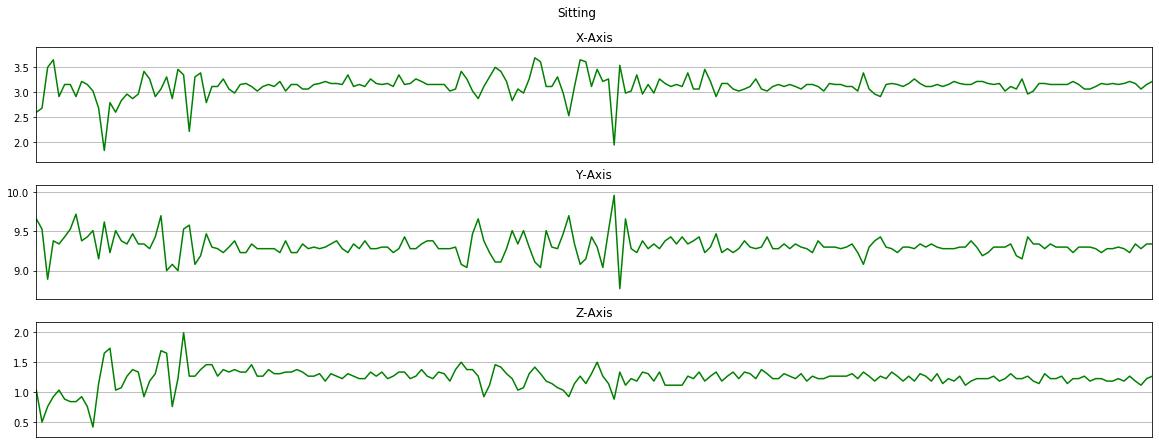

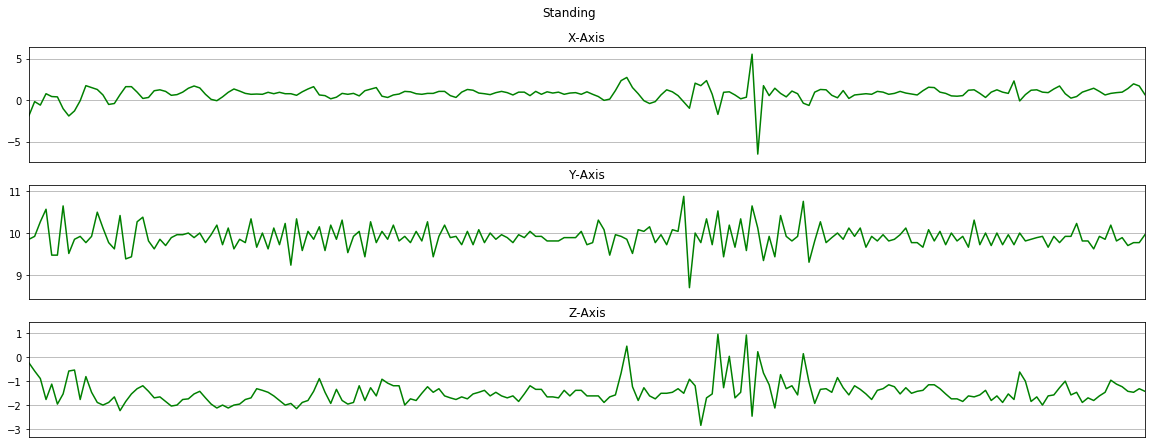

In [51]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(20, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [52]:
df=data.drop(['user','time'],axis=1)
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


# since this data is inbalanced and skewed toward walking and jogging so we need to balance the data

In [132]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [144]:
walking=df[df['activity']=='Walking'].head(3555).copy()
jogging=df[df['activity']=='Jogging'].head(3555).copy()
Upstairs=df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs=df[df['activity']=='Downstairs'].head(3555).copy()
Sitting=df[df['activity']=='Sitting'].head(3555).copy()
Standing=df[df['activity']=='Standing'].head(3555).copy()
#Now we have balanced our dataSet

In [145]:

bal_df=pd.DataFrame()


In [146]:
bal_df=bal_df.append([walking,jogging,Upstairs,Downstairs,Sitting,Standing])

In [161]:
bal_df['activity'].value_counts()
#this is now balanced datasets

Walking       3555
Downstairs    3555
Jogging       3555
Sitting       3555
Upstairs      3555
Standing      3555
Name: activity, dtype: int64

In [162]:
bal_df.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [163]:
#using label encoder
from sklearn.preprocessing import LabelEncoder

In [272]:
label=LabelEncoder()
bal_df['label']=label.fit_transform(bal_df['activity'])
data['label']=label.fit_transform(data['activity'])


In [273]:
bal_df.head()
##now this is encoded

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [301]:
data.head()

,user,activity,time,x,y,z,label
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1


In [274]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [275]:
#now Standarising our data
from sklearn.preprocessing import StandardScaler


In [276]:
x=bal_df[['x','y','z']]
x1=data[['x','y','z']]
y=bal_df['label']
y1=data['label']

In [277]:
scaler=StandardScaler()
Scaled_X=scaler.fit_transform(x)
Scaled_X=pd.DataFrame(data=Scaled_X,columns=['x','y','z'])
Scaled_X['labels']=y.values

Scaled_X1=scaler.fit_transform(x1)
Scaled_X1=pd.DataFrame(data=Scaled_X1,columns=['x','y','z'])
Scaled_X1['labels']=y1.values




In [171]:
Scaled_X.head()

,x,y,z,labels
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5


In [302]:
Scaled_X1.head()

,x,y,z,labels
0,-0.258214,0.697059,0.044419,1
1,0.607502,0.483225,0.145310,1
2,0.590972,0.425654,-0.087046,1
3,-0.245817,1.575011,0.610023,1
4,-0.332596,0.610703,1.548620,1


In [280]:
Scaled_X.shape

(21330, 4)

In [303]:
Scaled_X1.shape

(343416, 4)

# Frame preperaton

In [173]:
import scipy.stats as stats

In [174]:
Fs=20
frame_size=Fs*4
hop_size=Fs*2


In [175]:
##creating an data set for time series 
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['labels'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [176]:
X,Y=get_frames(Scaled_X,frame_size,hop_size)

In [282]:
X1,Y1=get_frames(Scaled_X1,frame_size,hop_size)

In [177]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [284]:
X_train.shape,X_test.shape

((425, 80, 3, 1), (107, 80, 3, 1))

In [299]:
X1.shape

(8584, 80, 3, 1)

In [193]:
X_train[0].shape

(80, 3, 1)

In [194]:
X_train=X_train.reshape(425, 80, 3,1)
X_test=X_test.reshape(107, 80, 3,1)


In [289]:
X1=X1.reshape(8584, 80, 3,1)
Y1.shape


(8584,)

In [184]:
# Building an 2D convolution model 

In [202]:
model=Sequential()
model.add(Conv2D(64,(2,2),activation='relu',input_shape=X_train[0].shape))
# model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(127,(2,2),activation='relu'))
# model.add(BatchNormalization())
model.add(Dropout(0.1))

# model.add(Conv2D(64,(2,2),activation='relu'))
# # model.add(BatchNormalization())
# model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='softmax'))


In [203]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 79, 2, 64)         320       
_________________________________________________________________
dropout_18 (Dropout)         (None, 79, 2, 64)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 78, 1, 127)        32639     
_________________________________________________________________
dropout_19 (Dropout)         (None, 78, 1, 127)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9906)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                634048    
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)              

In [255]:
model.compile(optimizer=Adam(learning_rate=0.0002),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [258]:
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10)

Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 0s 206us/sample - loss: 7.0729e-04 - accuracy: 1.0000 - val_loss: 0.4385 - val_accuracy: 0.9346
Epoch 2/10
425/425 [==============================] - 0s 181us/sample - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4682 - val_accuracy: 0.9346
Epoch 3/10
425/425 [==============================] - 0s 191us/sample - loss: 9.0509e-04 - accuracy: 1.0000 - val_loss: 0.5377 - val_accuracy: 0.9346
Epoch 4/10
425/425 [==============================] - 0s 183us/sample - loss: 1.9792e-04 - accuracy: 1.0000 - val_loss: 0.5711 - val_accuracy: 0.9346
Epoch 5/10
425/425 [==============================] - 0s 178us/sample - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5571 - val_accuracy: 0.9346
Epoch 6/10
425/425 [==============================] - 0s 183us/sample - loss: 3.4237e-04 - accuracy: 1.0000 - val_loss: 0.5250 - val_accuracy: 0.9346
Epoch 7/10
425/425 [==============================] - 0s 180us

In [218]:
def plot_learning(history,epoch):
    epoch_range=range(1,epoch+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()
    

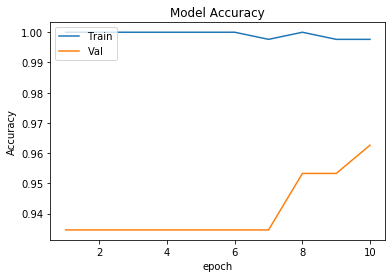

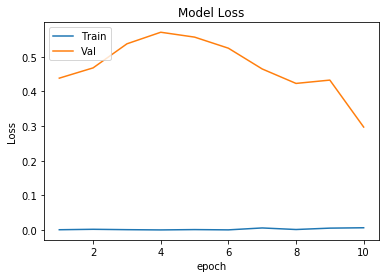

In [259]:
plot_learning(history,epoch=10)

# Confusion MAtrix/


In [260]:
Y_pred=model.predict_classes(X_test)


In [261]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [262]:
mat=confusion_matrix(Y_test,Y_pred)

In [263]:
mat

array([[17,  0,  0,  0,  3,  0],
       [ 0, 17,  0,  0,  0,  1],
       [ 0,  0, 21,  0,  0,  0],
       [ 0,  0,  0, 18,  0,  0],
       [ 0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  0, 15]], dtype=int64)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x260a12e67f0>)

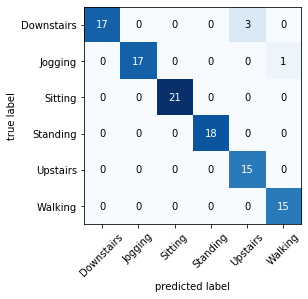

In [264]:
plot_confusion_matrix(mat,class_names=label.classes_)

In [265]:
from sklearn.metrics import accuracy_score

In [266]:
accuracy_score(Y_test,Y_pred)

0.9626168224299065

In [267]:
bal_df.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [312]:
Y_pred2=model.predict_classes(X1_test)

In [313]:
accuracy_score(Y1_test,Y_pred2)

0.3011065812463599

In [308]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=0)